In [1]:
import sys
import os
import pandas as pd
import numpy as np
from importlib import reload

# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# local import
sys.path.append("../")
from utils.trackmate import dataEngineering as _tm
from utils.visualization import generalPlots as _plot
from utils.trackmate import spatialAnalysis as _stat

/home/cstansbu/.local/lib/python3.8/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [2]:
"""Load Data
"""
path = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/analysis_files/CLEANED_TRACKS2021-06-24.csv"

df = pd.read_csv(path)
print(df.shape)
df.head()

(3881581, 69)


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,TOTAL_ABSOLUTE_ANGLE_YZ,TOTAL_ABSOLUTE_ANGLE_ZX,STEP,NORMED_STEP,MEAN_GREEN_INTENSITY_SCALED,MEAN_BLUE_INTENSITY_SCALED,MEAN_RED_INTENSITY_SCALED,MEAN_OBLIQUE_INTENSITY_SCALED,MEAN_INTENSITY_SCALED,SCENE
0,ID8623116,8623116,C4_0,2.285,130.303,0.0,0,1448.469,1,10,...,0.0,-1.571,0,0.000000,0.349146,0.028039,0.369497,0.314429,0.028039,C4
1,ID8630795,8630795,C4_0,2.656,130.303,0.0,0,2896.938,2,10,...,0.0,-1.571,1,0.000017,0.398619,0.216329,0.654788,0.114998,0.216329,C4
2,ID8615379,8615379,C4_0,2.498,133.075,0.0,0,4345.407,3,10,...,0.0,-1.571,2,0.000035,0.423814,0.208794,0.000000,0.136825,0.208794,C4
3,ID8608272,8608272,C4_0,2.825,131.689,0.0,0,5793.876,4,10,...,0.0,-1.571,3,0.000052,0.592297,0.329101,0.513672,0.033826,0.329101,C4
4,ID8603473,8603473,C4_0,2.744,131.689,0.0,0,7242.345,5,10,...,0.0,-1.571,4,0.000069,0.552233,0.411018,0.489437,0.166280,0.411018,C4


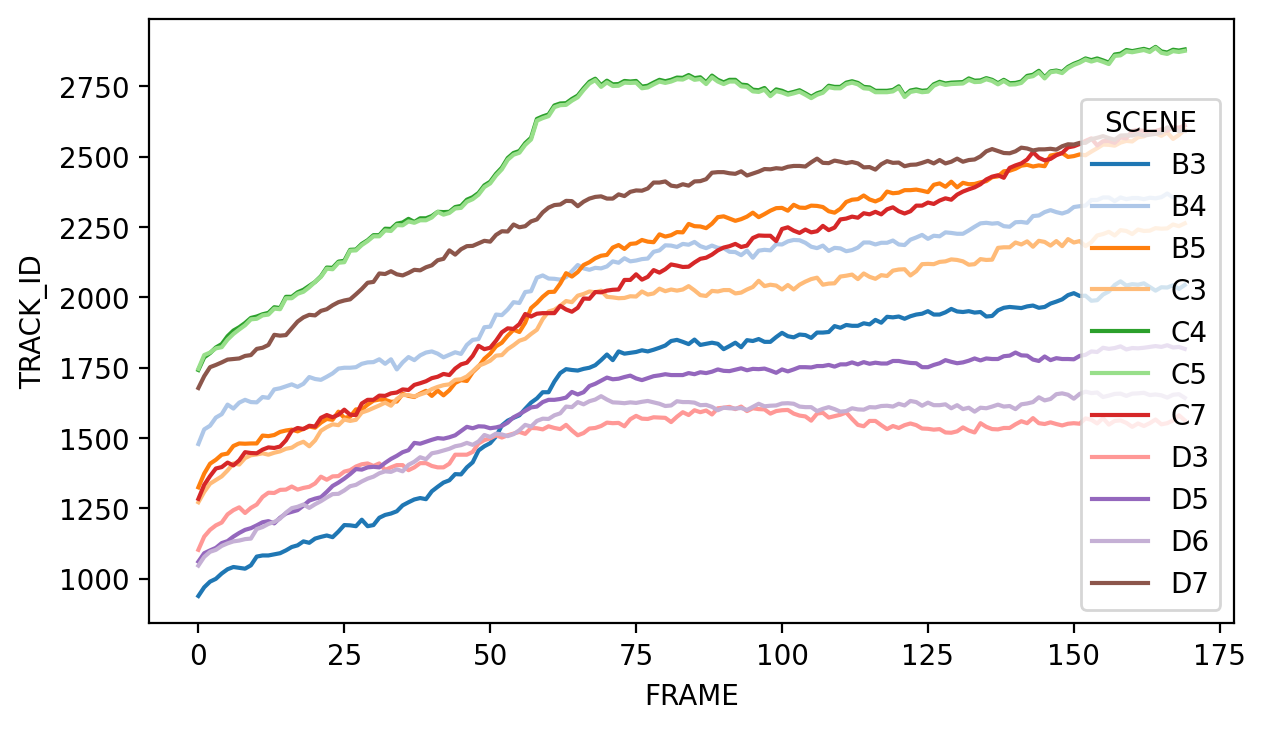

In [21]:
"""
groupy by time and scene
"""

by_frame = df.groupby(['FRAME', 'SCENE'], as_index=False).agg({
    'TRACK_ID' : 'nunique',
})

by_frame.head()

by_frame = by_frame[by_frame['FRAME'] < 170]

matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (7, 4)
sns.lineplot(data=by_frame,
            x='FRAME',
            y='TRACK_ID',
            hue='SCENE',
            palette='tab20')

In [9]:
by_frame['SCENE'].value_counts()

C4    177
Name: SCENE, dtype: int64